   Unnamed: 0        date  n_sick   calls  n_duty  n_sby  sby_need  dafted
0           0  2016-04-01      73  8154.0    1700     90       4.0     0.0
1           1  2016-04-02      64  8526.0    1700     90      70.0     0.0
2           2  2016-04-03      68  8088.0    1700     90       0.0     0.0
3           3  2016-04-04      71  7044.0    1700     90       0.0     0.0
4           4  2016-04-05      63  7236.0    1700     90       0.0     0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1152 non-null   int64  
 1   date        1152 non-null   object 
 2   n_sick      1152 non-null   int64  
 3   calls       1152 non-null   float64
 4   n_duty      1152 non-null   int64  
 5   n_sby       1152 non-null   int64  
 6   sby_need    1152 non-null   float64
 7   dafted      1152 non-null   float64
dtypes: float64(3), int64(4), obje

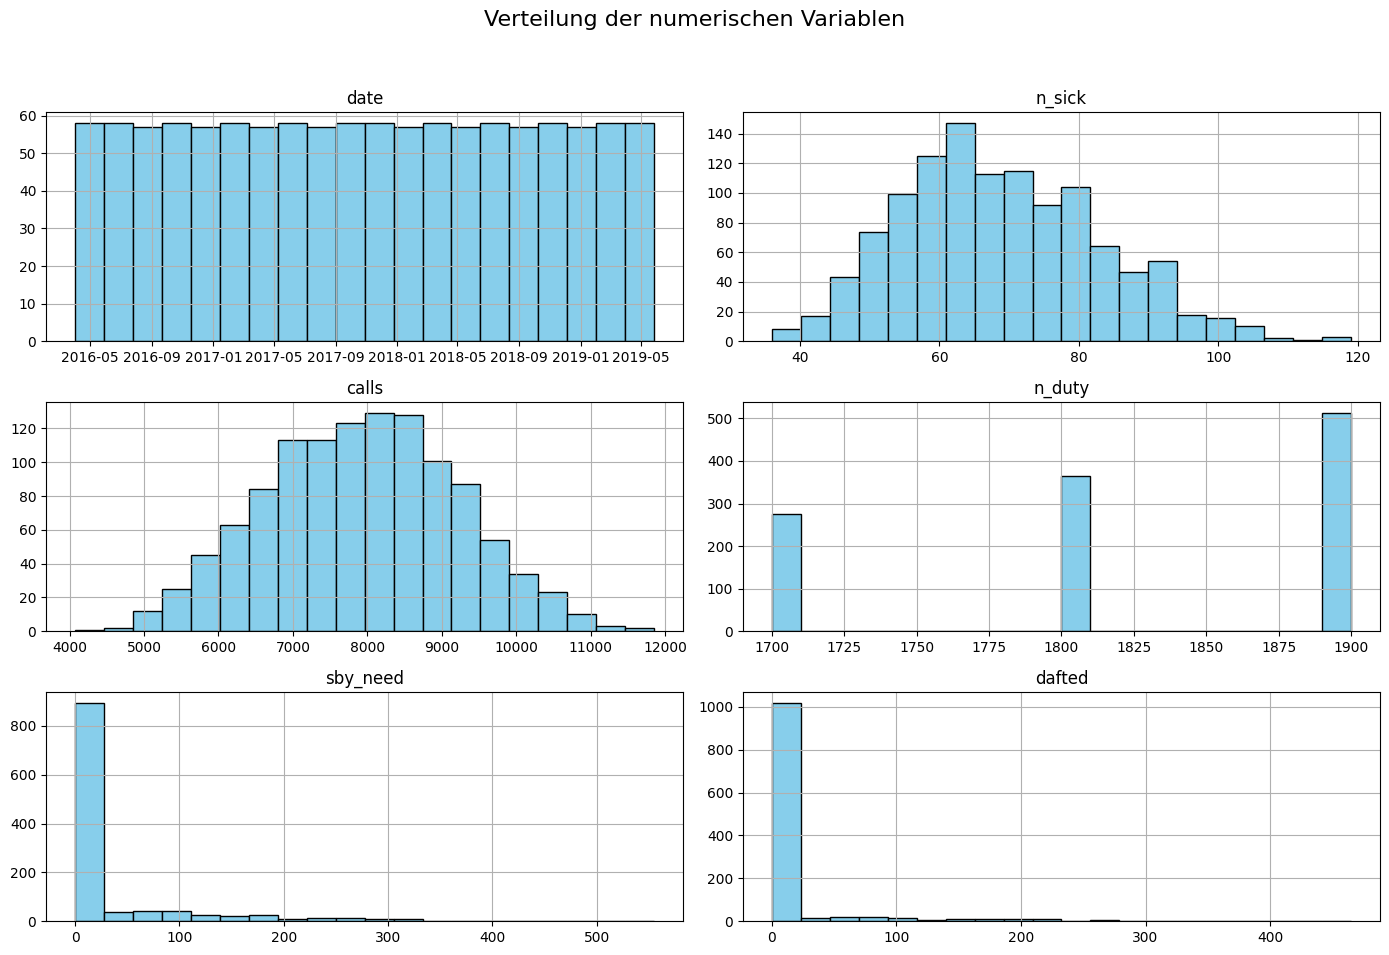

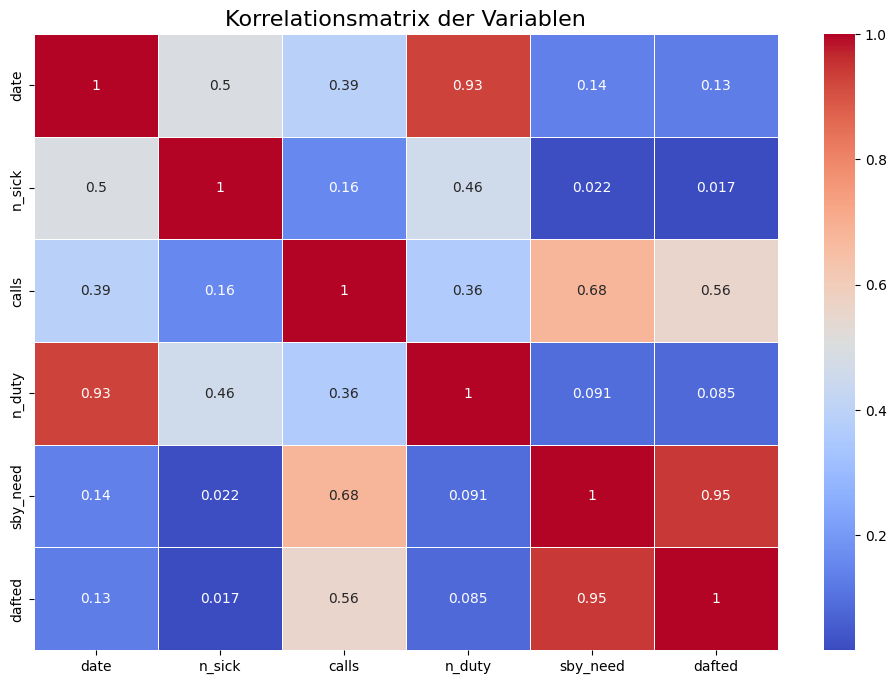

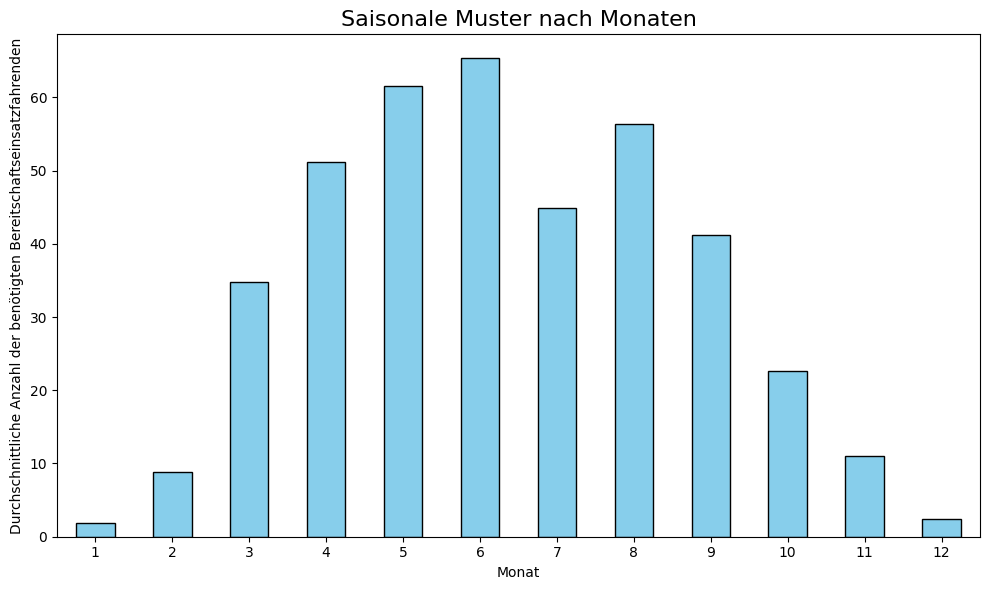

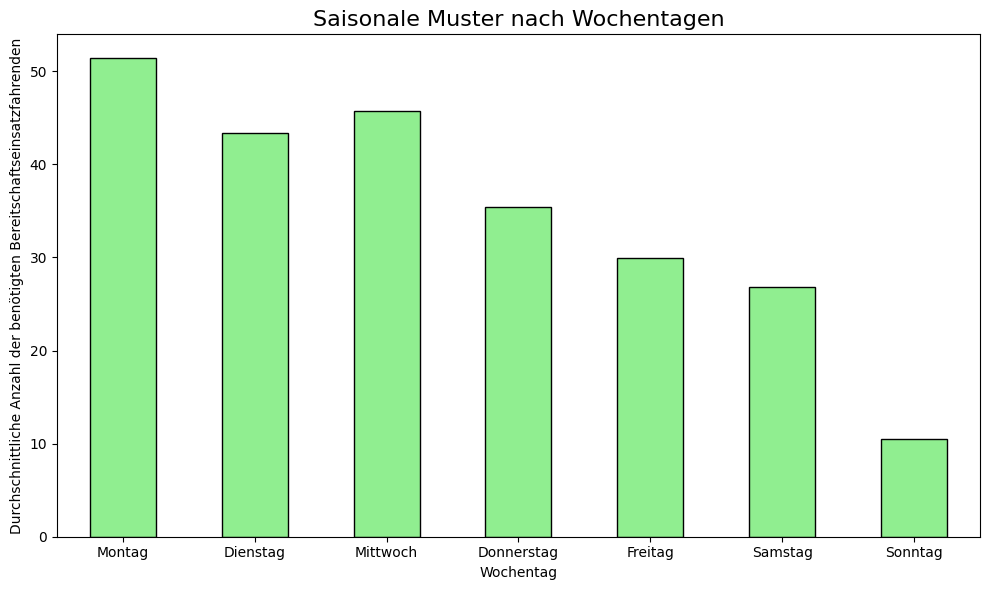

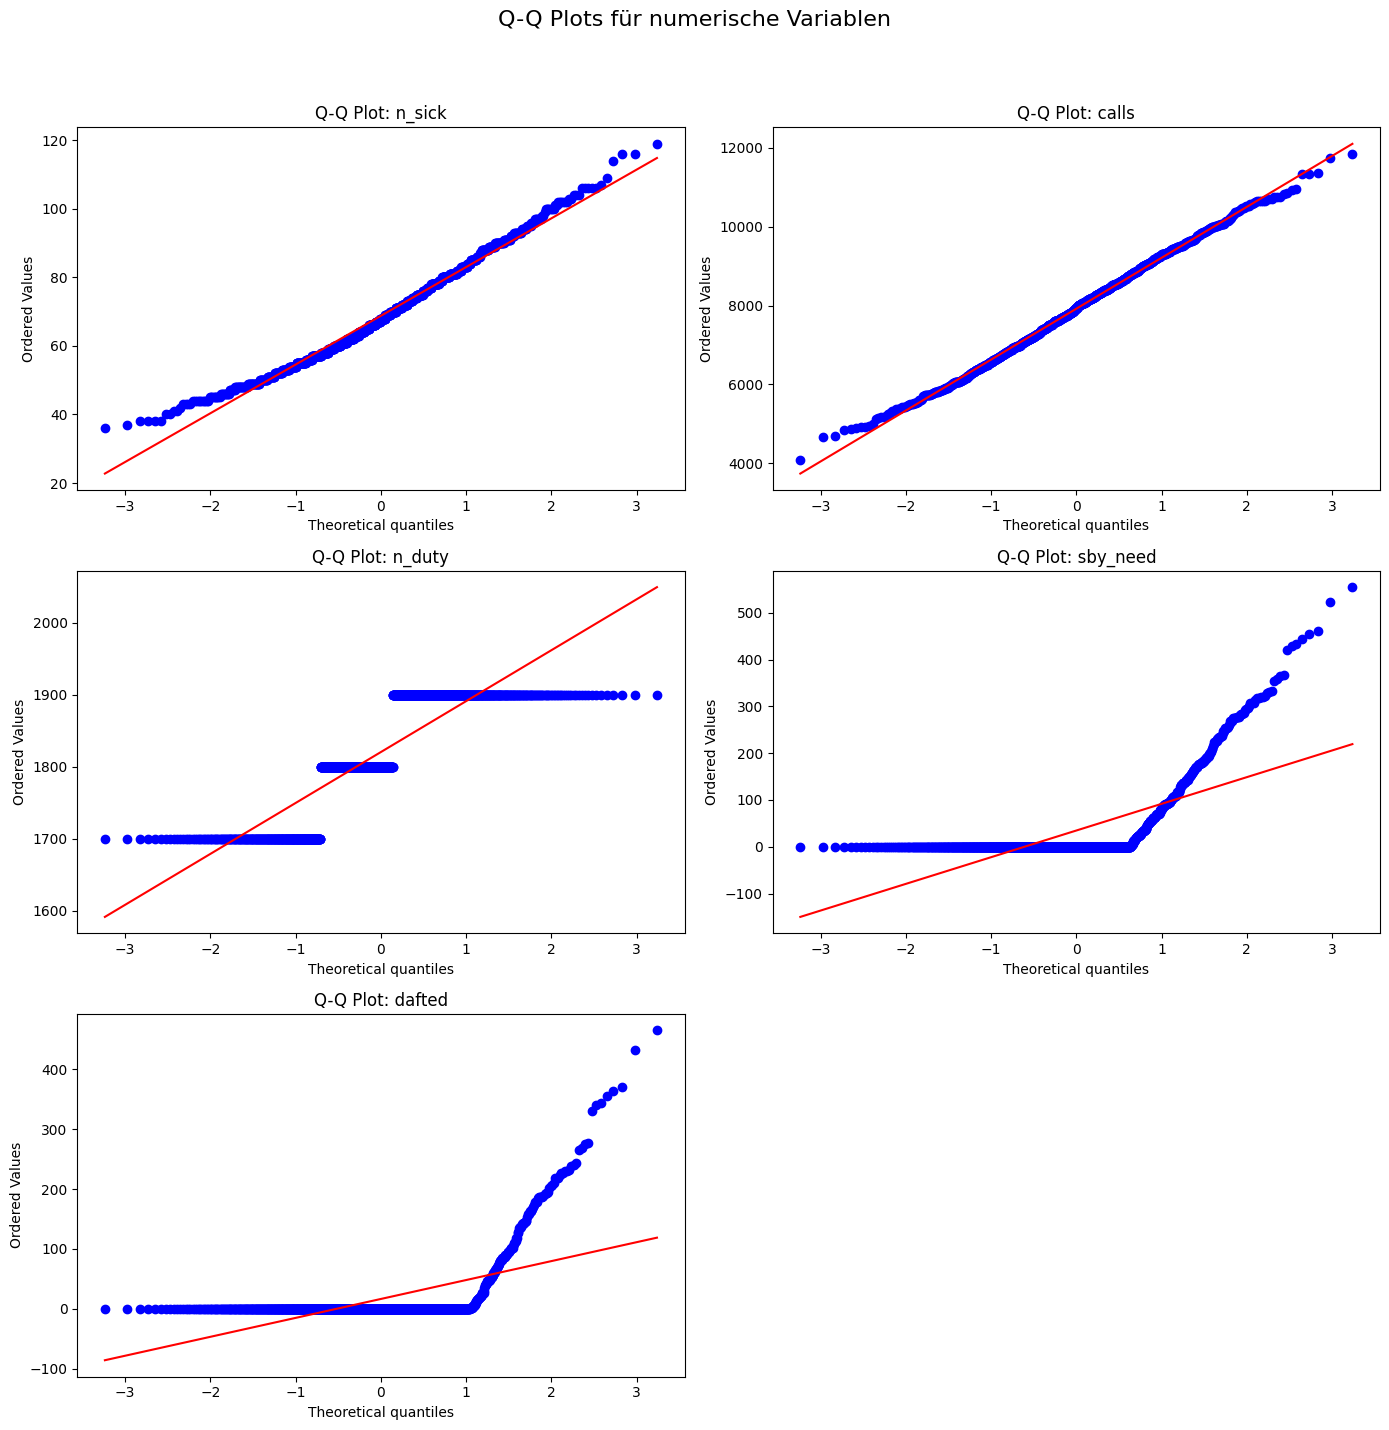


Shapiro-Wilk Test für Normalverteilung:
n_sick: Statistik=0.986, p-Wert=0.000
calls: Statistik=0.997, p-Wert=0.053
n_duty: Statistik=0.776, p-Wert=0.000
sby_need: Statistik=0.511, p-Wert=0.000
dafted: Statistik=0.351, p-Wert=0.000


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

def load_data(file_path):
    """Lädt die CSV-Daten und gibt den DataFrame zurück."""
    data = pd.read_csv(file_path)
    return data

def basic_data_info(data):
    """Zeigt grundlegende Informationen und eine statistische Zusammenfassung der Daten an."""
    print(data.head())
    print(data.info(), '\n')
    print(data.describe(), '\n')
    print(data.isnull().sum(), '\n')

def preprocess_data(data):
    """Vorverarbeitung der Daten: Konvertieren von Datumswerten und Entfernen unnötiger Spalten."""
    data['date'] = pd.to_datetime(data['date'])
    data = data.drop(columns=['Unnamed: 0', 'n_sby'])
    return data

def plot_histograms(data, save_path = r"..\visualizations\histogramme.png"):
    """Erstellt Histogramme für numerische Variablen und speichert sie als PNG."""
    data.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
    plt.suptitle('Verteilung der numerischen Variablen', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(save_path, format='png', dpi=300)
    #plt.show()

def plot_correlation_heatmap(data, save_path = r"..\visualizations\heatmap.png"):
    """Erstellt eine Korrelations-Heatmap und speichert sie als PNG."""
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Korrelationsmatrix der Variablen', fontsize=16)
    plt.savefig(save_path, format='png', dpi=300)
    #plt.show()
    print(correlation_matrix.to_markdown(), '\n')

def plot_seasonal_patterns(data):
    """Visualisiert saisonale Muster (nach Monaten und Wochentagen) und speichert die Plots."""
    
    # Monatliche Muster
    monthly_data = data.groupby(data['date'].dt.month)['sby_need'].mean()
    plt.figure(figsize=(10, 6))
    monthly_data.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Monat')
    plt.ylabel('Durchschnittliche Anzahl der benötigten Bereitschaftseinsatzfahrenden')
    plt.title('Saisonale Muster nach Monaten', fontsize=16)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig(r"..\visualizations\monatliche_muster_sby_need.png", format='png', dpi=300)
    #plt.show()
    
    # Wöchentliche Muster
    weekly_data = data.groupby(data['date'].dt.dayofweek)['sby_need'].mean()
    plt.figure(figsize=(10, 6))
    weekly_data.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.xlabel('Wochentag')
    plt.ylabel('Durchschnittliche Anzahl der benötigten Bereitschaftseinsatzfahrenden')
    plt.title('Saisonale Muster nach Wochentagen', fontsize=16)
    plt.xticks(ticks=range(7), labels=['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag'], rotation=0)
    plt.tight_layout()
    plt.savefig(r"..\visualizations\seisonale_muster_wochen_sby_need.png")
    #plt.show()

def qq_plots(data, save_path= r"..\visualizations\qq_plots.png"):
    """Erstellt Q-Q-Plots für numerische Variablen und speichert sie als PNG."""
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5*n_rows))
    fig.suptitle('Q-Q Plots für numerische Variablen', fontsize=16)
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        stats.probplot(data[col], dist="norm", plot=axes[i])
        axes[i].set_title(f'Q-Q Plot: {col}')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(save_path, format='png', dpi=300)
    plt.show()

def shapiro_wilk_test(data):
    """Führt den Shapiro-Wilk-Test für Normalverteilung durch."""
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    print("\nShapiro-Wilk Test für Normalverteilung:")
    for col in numeric_cols:
        stat, p = stats.shapiro(data[col])
        print(f'{col}: Statistik={stat:.3f}, p-Wert={p:.3f}')

def main():
    # Pfad zur CSV-Datei
    file_path = r"..\data\raw_data\sickness_table.csv"
    
    # Daten laden und Vorverarbeitung
    data = load_data(file_path)
    basic_data_info(data)
    data = preprocess_data(data)
    
    # Analysen und Plots
    plot_histograms(data)
    plot_correlation_heatmap(data)
    plot_seasonal_patterns(data)
    qq_plots(data)
    shapiro_wilk_test(data)

if __name__ == "__main__":
    main()
